### 2024-04-30 OLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

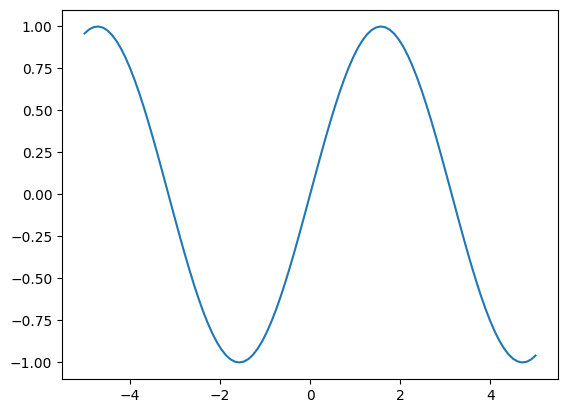

In [2]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)
_  = plt.plot(x, y)

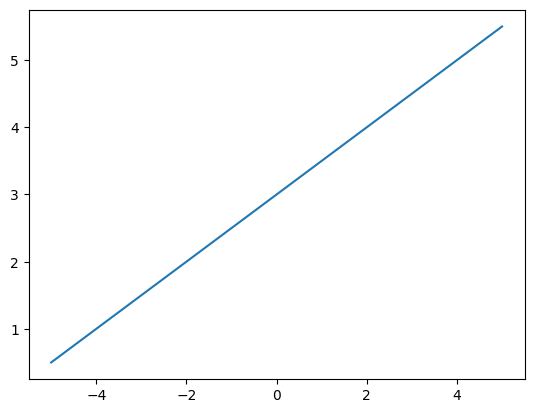

In [3]:
x = np.linspace(-5, 5, 100)
y = 3 + 0.5*x
_  = plt.plot(x, y)

In [4]:
hubble = pd.read_csv("hubble.csv", sep= "\t")
hubble

,object,ms,R,v,mt,Mt,D,Rmodern,vModern
0,S.Mag.,..,0.032,170,1.5,-16.0,0.03,0.061700,158.1
1,L.Mag.,..,0.030,290,0.5,-17.2,0.03,0.049970,278.0
2,N.G.C.6822,..,0.214,-130,9.0,-12.7,0.22,0.500000,-57.0
3,598,..,0.263,-70,7.0,-15.1,0.26,0.840000,-179.0
4,221,..,0.275,-185,8.8,-13.4,0.28,0.763000,-200.0
5,224,..,0.275,-220,5.0,-17.2,0.28,0.778000,-301.0
6,5457,17,0.450,200,9.9,-13.3,0.44,6.400000,241.0
7,4736,17.3,0.500,290,8.4,-15.1,0.50,4.910000,308.0
8,5194,17.3,0.500,270,7.4,-16.1,0.50,9.509202,463.2
9,4449,17.8,0.630,200,9.5,-14.5,0.63,3.600000,204.0


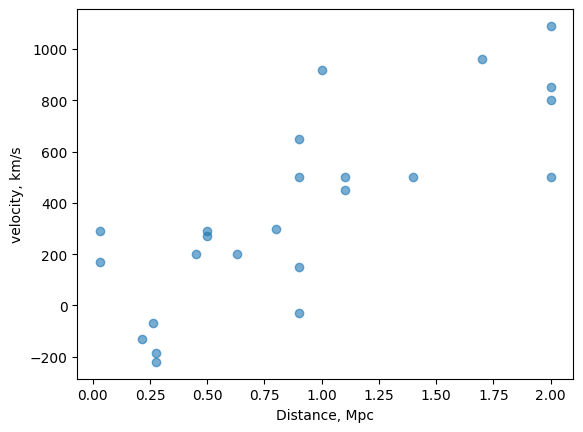

In [5]:
_ = plt.scatter(hubble.R, hubble.v, alpha = 0.6)
_ = plt.xlabel("Distance, Mpc")
_ = plt.ylabel("velocity, km/s")

In [6]:
x = hubble.R
y = hubble.v

In [7]:
b0 = 0
b1 = 350
yhat = b0 + b1*x

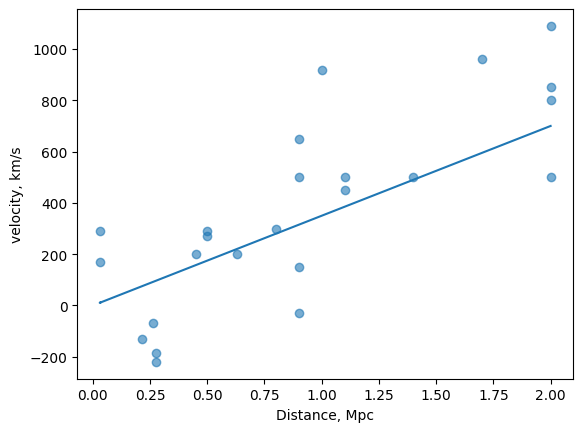

In [8]:
_ = plt.scatter(hubble.R, hubble.v, alpha = 0.6)
_ = plt.xlabel("Distance, Mpc")
_ = plt.ylabel("velocity, km/s")
_ = plt.plot(x, yhat)

In [9]:
b0 = 0
b1 = 350
yhat = b0 + b1*x
e = y - yhat
e2 = e**2
mse = np.mean(e2)
mse

57022.876145833325

In [10]:
b0 = 0
b1 = 350
yhat = b0 + b1*x
mse = np.mean((y - yhat)**2)
b0, b1, mse

(0, 350, 57022.876145833325)

In [12]:
import statsmodels.formula.api as smf

In [13]:
m = smf.ols("v ~ R", data = hubble).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      v   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     36.38
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.53e-06
Time:                        14:15:32   Log-Likelihood:                -163.84
No. Observations:                  24   AIC:                             331.7
Df Residuals:                      22   BIC:                             334.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.4360     83.448     -0.485      0.633    -213.497     132.625
R            453.8600     75.246      6.032      0.000     297.810     609.910
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.295
Skew:                           0.139   Prob(JB):                        0.863
Kurtosis:                       2.533   Cond. No.                         3.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""